In [1]:
import numpy as np
import pandas as pd
import polars as pl

from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
from chart_studio import plotly as py
from plotly import graph_objects as go
import plotly.express as px
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
import cufflinks as cf

pd.options.display.max_columns = 15
pd.options.display.max_rows = 25
pd.options.display.precision = 1
%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()

In [2]:
cars_df = sns.load_dataset('mpg')
cars_pldf = pl.DataFrame(cars_df)

In [3]:
cars_pldf\
.lazy()\
.fetch(3)

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
f64,i64,f64,f64,i64,f64,i64,str,str
18.0,8,307.0,130.0,3504,12.0,70,"""usa""","""chevrolet chev..."
15.0,8,350.0,165.0,3693,11.5,70,"""usa""","""buick skylark ..."
18.0,8,318.0,150.0,3436,11.0,70,"""usa""","""plymouth satel..."


In [4]:
cars_pldf\
.select(pl.col(pl.Float64))

mpg,displacement,horsepower,acceleration
f64,f64,f64,f64
18.0,307.0,130.0,12.0
15.0,350.0,165.0,11.5
18.0,318.0,150.0,11.0
16.0,304.0,150.0,12.0
17.0,302.0,140.0,10.5
15.0,429.0,198.0,10.0
14.0,454.0,220.0,9.0
14.0,440.0,215.0,8.5
14.0,455.0,225.0,10.0


In [5]:
cars_pldf.select(pl.col('mpg').filter(pl.col('mpg') >= 15))

mpg
f64
18.0
15.0
18.0
16.0
17.0
15.0
15.0
15.0
15.0


In [6]:
cars_pldf.select(pl.col('mpg').n_unique().alias('count of mpg'))

count of mpg
u32
129


In [7]:
cars_pldf\
.select([pl.when(pl.col('mpg') > 25).then('high').otherwise(pl.when(pl.col('mpg') > 15).then('mid').otherwise('low')).alias('mpg categ'), pl.col('cylinders')])\
.groupby(by = ['cylinders', 'mpg categ']).count().sort(by = 'cylinders', reverse = True)

cylinders,mpg categ,count
i64,str,u32
8,"""low""",65
8,"""high""",1
8,"""mid""",37
6,"""high""",6
6,"""mid""",74
6,"""low""",4
5,"""mid""",1
5,"""high""",2
4,"""high""",149


In [8]:
data = cars_pldf.select(['origin', 'cylinders']).groupby(['origin', 'cylinders']).count().to_pandas()

In [9]:
data

,origin,cylinders,count
0,europe,5,3
1,usa,8,103
2,europe,6,4
3,usa,6,74
4,japan,6,6
5,europe,4,63
6,japan,4,69
7,usa,4,72
8,japan,3,4


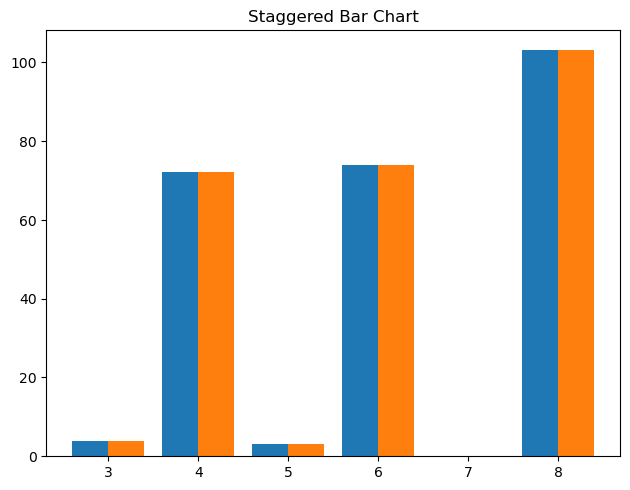

In [10]:
plt.bar(data['cylinders']-0.2, data['count'], width = 0.4)
plt.bar(data['cylinders']+0.2, data['count'], width=0.4)
plt.tight_layout()
plt.title('Staggered Bar Chart')
plt.show()

<AxesSubplot:xlabel='origin', ylabel='mpg'>

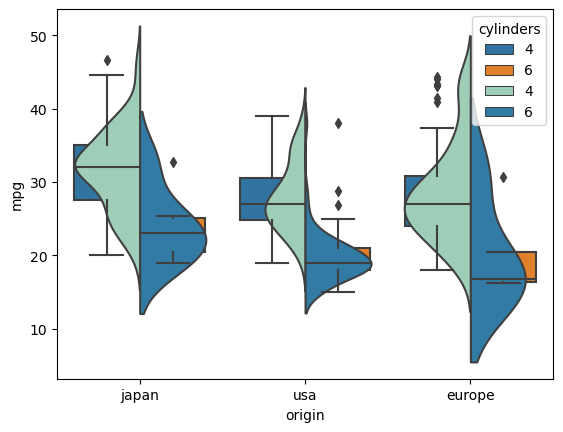

In [27]:
sns.boxplot(data = cars_pldf.filter((pl.col('cylinders') == 4) | (pl.col('cylinders') == 6)).to_pandas(), y = 'mpg', x = 'origin', hue = 'cylinders', dodge= True)
sns.violinplot(data = cars_pldf.filter((pl.col('cylinders') == 4) | (pl.col('cylinders') == 6)).to_pandas(), x = 'origin', y = 'mpg', hue = 'cylinders', split = True, inner = None, palette='YlGnBu', alpha = [0.2, 0.3, 0.4])

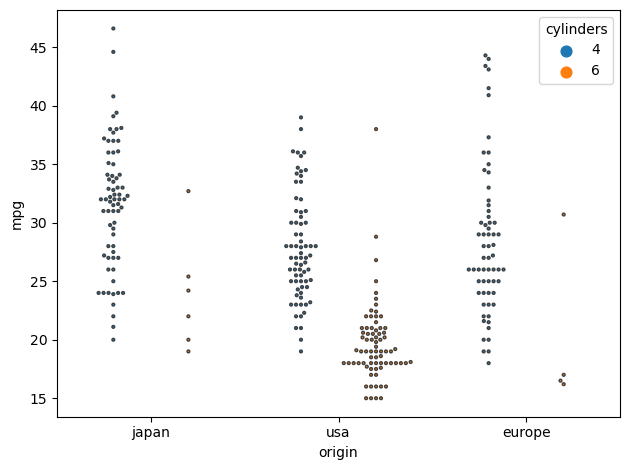

In [38]:
sns.swarmplot(data = cars_pldf.filter((pl.col('cylinders') == 4) | (pl.col('cylinders') == 6)).to_pandas(), x = 'origin', y = 'mpg', 
linewidth = 1, edgecolor = 'gray', hue = 'cylinders', dodge = True, size = 2)
plt.tight_layout()

In [39]:
cars_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [43]:
data = cars_df[((cars_df.cylinders == 4) | (cars_df.cylinders == 6) | (cars_df.cylinders == 8)) & ((cars_df.origin == 'europe') | (cars_df.origin == 'usa'))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


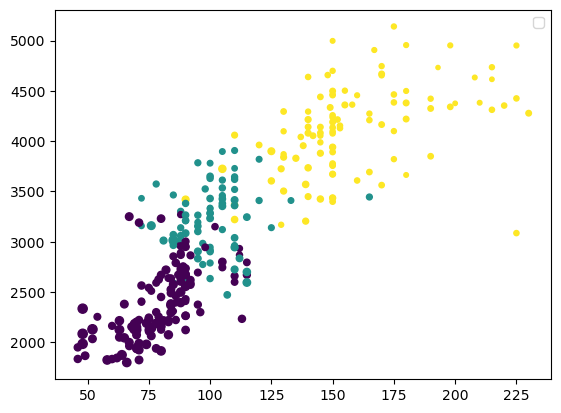

In [56]:
plt.scatter(x = data.horsepower, y = data.weight, c = data.cylinders, s = data.mpg)
plt.legend(loc = 'best')
plt.show()

In [47]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


(array([0.00941299, 0.03496253, 0.07261448, 0.05244379, 0.05109908,
        0.0430308 , 0.03361781, 0.03899667, 0.03765195, 0.01479184,
        0.01344713, 0.00941299, 0.00537885, 0.00268943, 0.00537885]),
 array([ 9.        , 11.35333333, 13.70666667, 16.06      , 18.41333333,
        20.76666667, 23.12      , 25.47333333, 27.82666667, 30.18      ,
        32.53333333, 34.88666667, 37.24      , 39.59333333, 41.94666667,
        44.3       ]),
 <BarContainer object of 15 artists>)

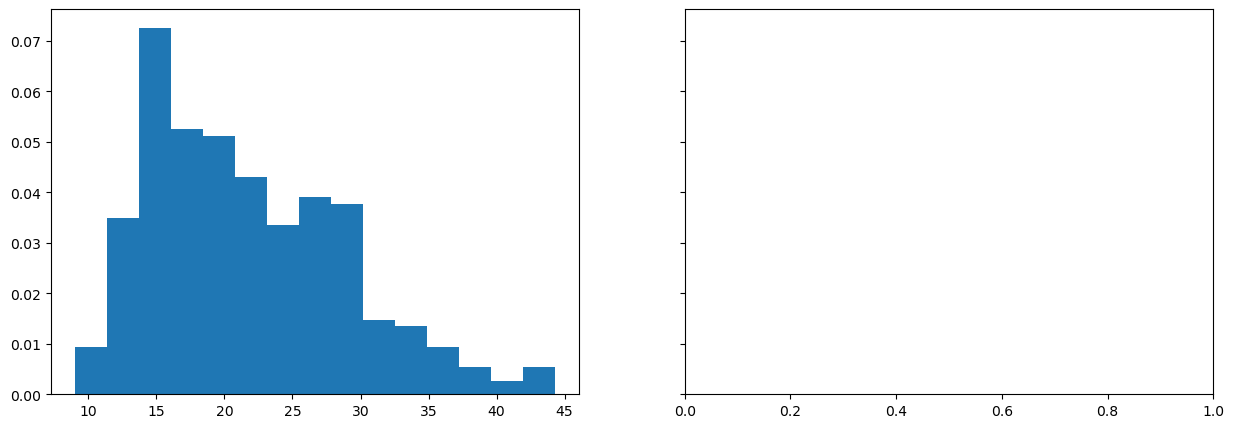

In [64]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (15, 5))
ax[0].hist(x = data.mpg, bins = 15, density = True)

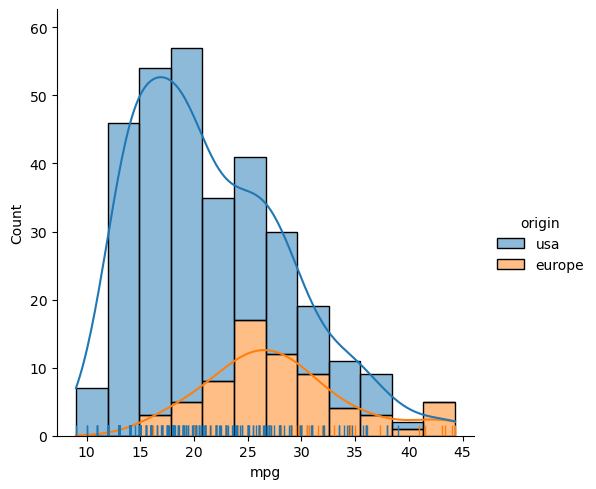

In [71]:
sns.displot(data = data, x = 'mpg', hue = 'origin', kind = 'hist', rug = True, multiple = 'stack', kde = True)